In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})

Welcome to JupyROOT 6.15/01


In [2]:
#Carbon
y = {}
erry = {}


x = np.array([0.1425, 0.1875,0.2325,0.2775,0.3225,0.3675,0.4125,0.4575,0.5025,0.5475])
y['C'] = np.array([1.031032, 1.02303,1.009893,1.004443,0.9968317,0.9889538,0.9866666,0.9698065,0.9668223,0.9708681])
erry['C'] = np.array([0.002447232, 0.001446791,0.00138758,0.001372777,0.001523497,0.001896623,0.002663127,0.004449254,.01128026,0.01416657])


## Iron 
y['Fe'] = np.array([1.121903,1.081699,1.045795,1.028482,1.013365,0.997723,0.9871229,0.9715619,0.9514922,0.9605647])
erry['Fe'] = np.array([0.002227331, 0.001249811,0.001157711,0.001117295,0.001205505,0.001478541,0.002053184,0.003426261,0.008658436,0.01116495])

#Lead
y['Pb'] = np.array([1.077806, 1.044195,       1.008421   ,0.985268 ,0.9610485 ,0.9381319 ,0.9176206 ,0.8867294,0.8553929,0.8835987])
erry['Pb'] =np.array([0.002477812,0.001440661,0.001363664,0.001332588,0.001458959,0.001800037,0.002491465,0.004075353,0.00973467,0.01313772])



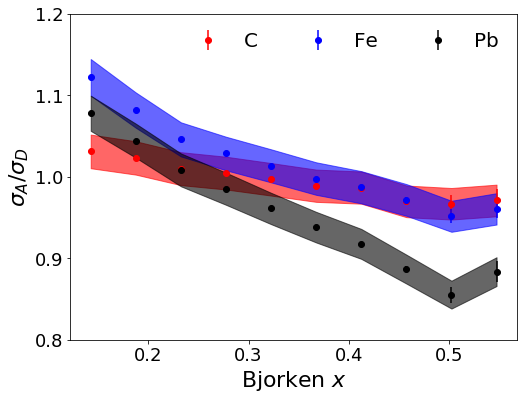

In [3]:
fig = plt.figure(figsize=(8,6))


colors = {}
colors['C'] = 'red'
colors['Fe'] = 'blue'
colors['Pb']= 'black'



for target in ['C','Fe','Pb']:
    plt.errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label=target)
    plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

plt.locator_params(nbins=6)
plt.ylim([0.8,1.2])
#plt.xlim([0.2,0.6])


plt.xlabel('Bjorken $x$',fontsize=22)
plt.ylabel('$\sigma_{A}/\sigma_{D}$',fontsize=22)
plt.legend(loc='best',ncol=3,frameon=False)

#plt.show()

#plt.tight_layout()
plt.savefig('EMCratio.png')


In [4]:
## Data Hakku

In [29]:
import csv

y_data = {}
erry_data = {}

x_data = []
y_data['C'] = []
erry_data['C'] = []
y_data['Al'] = []
erry_data['Al'] = []
y_data['Fe'] = []
erry_data['Fe'] = []
y_data['Pb'] = []
erry_data['Pb'] = []

pdf = {}
pdf['C'] = []
pdf['Fe'] = []
pdf['Pb'] = []

errpdf_plus = {}
errpdf_minus = {}

errpdf_plus['C'] = []
errpdf_plus['Fe'] = []
errpdf_plus['Pb'] = []

errpdf_minus['C'] = []
errpdf_minus['Fe'] = []
errpdf_minus['Pb'] = []

#data
#data.err
#original_PDF
#original_PDF_err_-
#original_PDF_err_+
#reweighted_PDF
#reweighted_PDF_err_-
#reweighted_PDF_err_+

with open('EPPSData.dta') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        #print(row)
        row = row[0].split()
        #print row[0], ' ', row[1]

       # x_data.append(row[0])
        x_data.append(float(row[0]))
        y_data['C'].append(float(row[1]))
        erry_data['C'].append(float(row[2]))
        
        pdf['C'].append(float(row[6])) 
        errpdf_minus['C'].append(float(row[7]))
        errpdf_plus['C'].append(float(row[8]))
        
        y_data['Al'].append(float(row[9]))
        erry_data['Al'].append(float(row[10]))
        
        y_data['Fe'].append(float(row[17]))
        erry_data['Fe'].append(float(row[18]))
        
        
        pdf['Fe'].append(float(row[22])) 
        errpdf_minus['Fe'].append(float(row[23]))
        errpdf_plus['Fe'].append(float(row[24]))
                
        
        y_data['Pb'].append(float(row[25]))
        erry_data['Pb'].append(float(row[26]))
        
                
        pdf['Pb'].append(float(row[30])) 
        errpdf_minus['Pb'].append(float(row[31]))
        errpdf_plus['Pb'].append(float(row[32]))
        
print 'x_data'
print x_data
print 'y_data'
print y_data['C']
print 'erry'
print erry_data['C']
                   

x_data
[0.22, 0.247, 0.26, 0.273, 0.287, 0.3, 0.313, 0.327, 0.34, 0.353, 0.367, 0.38, 0.393, 0.407, 0.42, 0.433, 0.447, 0.46, 0.473, 0.487, 0.5, 0.513, 0.527, 0.54, 0.553, 0.58]
y_data
[1.054, 1.032, 1.022, 1.018, 1.009, 1.005, 1.008, 1.009, 1.005, 0.9936, 0.9886, 0.9846, 0.9756, 0.9906, 0.9796, 0.9586, 0.9566, 0.9496, 0.9556, 0.9396, 0.9386, 0.9476, 0.9356, 0.9306, 0.9056, 0.9256]
erry
[0.053, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.019, 0.047]


26
26
26
26
26
26
26


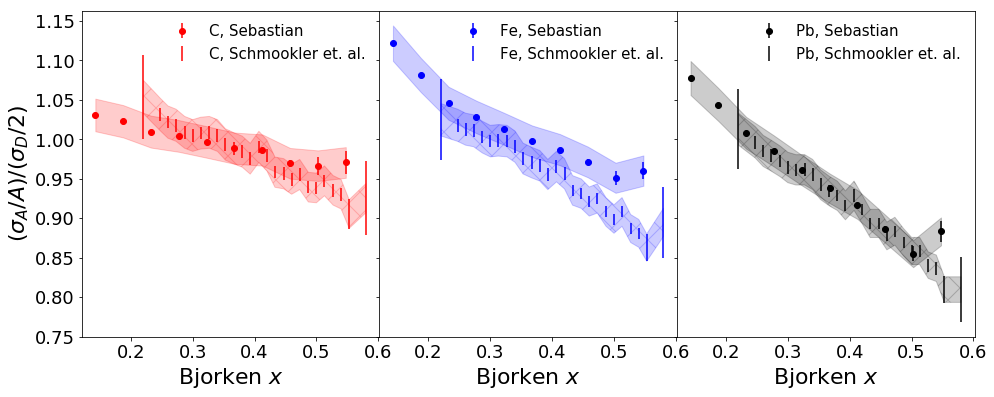

In [14]:
fig = plt.figure(figsize=(16,12))

print len(x_data)
print len(y_data['C'])
print len(erry_data['C'])
print len(y_data['Fe'])
print len(erry_data['Fe'])
print len(y_data['Pb'])
print len(erry_data['Pb'])
fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    axs[i].errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label='%s, Sebastian'%target)
    axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],color=colors[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    axs[i].fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.2)
    axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")
    axs[i].xaxis.set_label_text('Bjorken $x$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=15)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)
#plt.legend(loc='best',ncol=1,frameon=False,fontsize=15)
    #plt.fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.6)

## Compared to PDF

26
26
10
26
26
26
error pdf minus
26
26
26
error pdf plus
26
26
26
26
26
26
26
26
[1.023  1.019  1.017  1.014  1.01   1.007  1.004  1.     0.9964 0.9927
 0.9887 0.9849 0.981  0.9765 0.9723 0.9681 0.9637 0.9595 0.9555 0.9513
 0.9474 0.9437 0.9398 0.9363 0.933  0.9275]
[-0.0135  -0.01349 -0.01361 -0.01376 -0.014   -0.01419 -0.01428 -0.01449
 -0.01464 -0.01474 -0.0148  -0.01481 -0.01475 -0.0146  -0.01445 -0.01434
 -0.01422 -0.01413 -0.01412 -0.01414 -0.01418 -0.01429 -0.01447 -0.01468
 -0.01494 -0.01549]


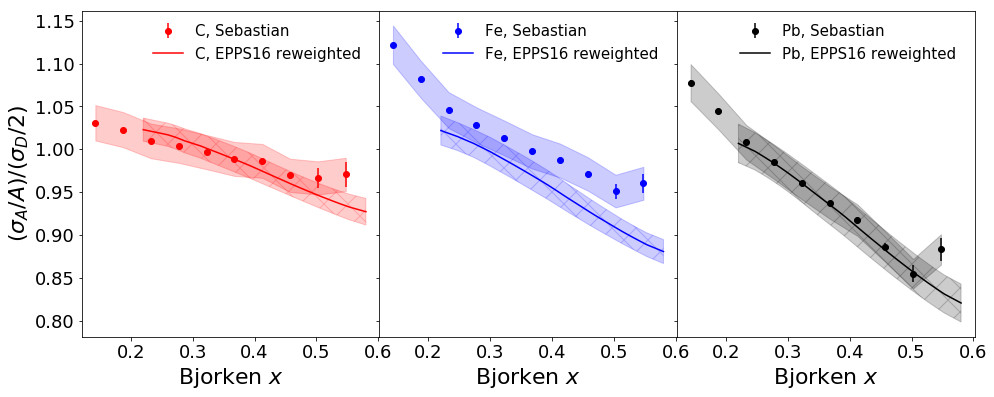

In [35]:
fig = plt.figure(figsize=(16,12))

print len(x_data)
print len(y_data['C'])

print len(x)
print len(pdf['C'])
print len(pdf['Pb'])
print len(pdf['Pb'])

print 'error pdf minus'
print len(errpdf_minus['C'])
print len(errpdf_minus['Pb'])
print len(errpdf_minus['Pb'])
print 'error pdf plus'
print len(errpdf_plus['C'])
print len(errpdf_plus['Pb'])
print len(errpdf_plus['Pb'])

print len(erry_data['C'])
print len(y_data['Fe'])
print len(erry_data['Fe'])
print len(y_data['Pb'])
print len(erry_data['Pb'])

print pdf['C']
print errpdf_minus['C']

fig, axs = plt.subplots(1, 3,sharex=True, sharey=True,figsize=(16,6),gridspec_kw={'hspace': 0, 'wspace':0})

for i,target in enumerate(['C','Fe','Pb']):
    pdf[target] = np.array(pdf[target])
    errpdf_minus[target] = np.array(errpdf_minus[target])
    errpdf_plus[target] = np.array(errpdf_plus[target])


for i,target in enumerate(['C','Fe','Pb']):
   
    axs[i].errorbar(x,y[target],yerr=erry[target],color=colors[target],fmt='o',label='%s, This work'%target)
    
    axs[i].errorbar(x_data,pdf[target],color=colors[target],fmt='',ls='-',label='%s, EPPS16 reweighted '%target)
    axs[i].fill_between(x_data,pdf[target]+errpdf_minus[target],pdf[target]+errpdf_plus[target],color=colors[target],alpha=0.2,hatch="X")

    
    #axs[i].errorbar(x_data,y_data[target],yerr=erry_data[target],color=colors[target],fmt='-',ls='None',label='%s, Schmookler et. al.'%target)
    axs[i].fill_between(x, 1.02*y[target],0.98*y[target],color=colors[target],alpha=0.2)
    #axs[i].fill_between(x_data,np.multiply(y_data[target],1.02),np.multiply(y_data[target],0.98),color=colors[target],alpha=0.2,hatch="X")
    axs[i].xaxis.set_label_text('Bjorken $x$',fontsize=22)
    axs[i].legend(loc='best',ncol=1,frameon=False,fontsize=15)

axs[0].yaxis.set_label_text('$(\sigma_{A}/A)/(\sigma_{D}/2)$',fontsize=22)

## Format

In [ ]:
#data
#data.err
#original_PDF
#original_PDF_err_-
#original_PDF_err_+
#reweighted_PDF
#reweighted_PDF_err_-
#reweighted_PDF_err_+
